# pass@k analysis
This notebook demonstrates how to visualize which model managed to achieve which pass@k value.

In [1]:
import pandas as pd
import os

In [2]:
directory = "../data/"

collection = []
for filename in os.listdir(directory):
    if filename.endswith(".csv"):
        print(filename)
        df = pd.read_csv(directory + filename)
        df['model'] = filename.replace("_passk_results.csv", "").replace("samples_", "")
        collection.append(df)

df = pd.concat(collection)

samples_deepseek-coder-v2_old_prompt_passk_results.csv
samples_deepseek-coder-v2_passk_results.csv
samples_gpt-4o-2024-05-13_old_prompt_passk_results.csv
samples_gpt-4o-2024-05-13_passk_results.csv
samples_reference_old_prompt_passk_results.csv
samples_reference_passk_results.csv


In [3]:
df

,Unnamed: 0,pass@1,pass@5,pass@10,model
0,0,0.368421,0.642161,0.719298,deepseek-coder-v2_old_prompt
0,0,0.410526,0.665205,0.754386,deepseek-coder-v2
0,0,0.508772,0.694932,0.754386,gpt-4o-2024-05-13_old_prompt
0,0,0.561404,0.708995,0.754386,gpt-4o-2024-05-13
0,0,1.000000,1.000000,1.000000,reference_old_prompt
0,0,1.000000,1.000000,1.000000,reference


In [4]:
# Drop the "Unnamed: 0" column from the dataframe
df = df.drop("Unnamed: 0", axis=1)
df = df.sort_values("pass@1", ascending=False)
df

,pass@1,pass@5,pass@10,model
0,1.000000,1.000000,1.000000,reference_old_prompt
0,1.000000,1.000000,1.000000,reference
0,0.561404,0.708995,0.754386,gpt-4o-2024-05-13
0,0.508772,0.694932,0.754386,gpt-4o-2024-05-13_old_prompt
0,0.410526,0.665205,0.754386,deepseek-coder-v2
0,0.368421,0.642161,0.719298,deepseek-coder-v2_old_prompt


In [5]:
# Set the "model" column as the index and then transpose
df_transposed = df.set_index('model').transpose()
df_transposed['k'] = [1,5,10]
df_transposed

model,reference_old_prompt,reference,gpt-4o-2024-05-13,gpt-4o-2024-05-13_old_prompt,deepseek-coder-v2,deepseek-coder-v2_old_prompt,k
pass@1,1.0,1.0,0.561404,0.508772,0.410526,0.368421,1
pass@5,1.0,1.0,0.708995,0.694932,0.665205,0.642161,5
pass@10,1.0,1.0,0.754386,0.754386,0.754386,0.719298,10


     pass@1    pass@5   pass@10                         model
0  1.000000  1.000000  1.000000          reference_old_prompt
0  1.000000  1.000000  1.000000                     reference
0  0.561404  0.708995  0.754386             gpt-4o-2024-05-13
0  0.508772  0.694932  0.754386  gpt-4o-2024-05-13_old_prompt
0  0.410526  0.665205  0.754386             deepseek-coder-v2
0  0.368421  0.642161  0.719298  deepseek-coder-v2_old_prompt


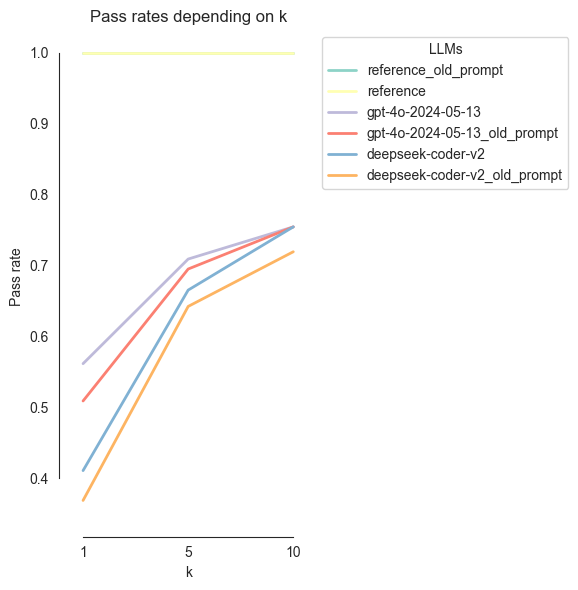

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("white")


# Assuming 'k' is an index after transposition, let's reset the index first if not already done
if 'k' not in df_transposed.columns:
    df_transposed.reset_index(inplace=True)
print(df)
# Separate 'k' column for x-axis
x = df_transposed['k']
vals = df_transposed.drop('k', axis=1)
fig = plt.figure(figsize=(6,6))
g = sns.lineplot(vals, palette="Set3", dashes=False, linewidth=2)
sns.despine(offset=10, trim=True);
g.set_xticklabels(x)

# Adding plot decorations
plt.xlabel('k')
plt.ylabel('Pass rate')
plt.title('Pass rates depending on k')
plt.legend(title='LLMs', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

plt.savefig("../docs/paper/pass_k_llms_plot.png", dpi=300, bbox_inches='tight')
plt.show()

In [7]:
df_transposed.drop('k', axis=1)

model,reference_old_prompt,reference,gpt-4o-2024-05-13,gpt-4o-2024-05-13_old_prompt,deepseek-coder-v2,deepseek-coder-v2_old_prompt
pass@1,1.0,1.0,0.561404,0.508772,0.410526,0.368421
pass@5,1.0,1.0,0.708995,0.694932,0.665205,0.642161
pass@10,1.0,1.0,0.754386,0.754386,0.754386,0.719298
